# NeoByte Task 2

**1. Dataset Exploration:**

*    Download the Iris dataset.
*    Use Python libraries like pandas and NumPy to load and explore the dataset.
*    Perform basic data cleaning and preprocessing tasks (e.g., handling missing values, converting data types).
*    Generate basic descriptive statistics (mean, median, standard deviation) for the dataset.


**2. Data Visualization:**
* Create visualizations (e.g., histograms, scatter plots, box plots) using libraries like matplotlib or seaborn to understand the data distribution and relationships between variables.

**3. Data Analysis (Optional):**

* If applicable, perform a simple exploratory data analysis (EDA).This could include identifying potential correlations between variables, identifying outliers, or making initial observations about the data.




# Headers

In [6]:
import pandas as pd #importing pandas library used for working with datasets and manipulating data.
import numpy as np #importing numpy library used for working with mathematical calculations.
from sklearn.datasets import load_iris #loading the iris dataset.
import matplotlib.pyplot as plt #used for data visulaization.
import seaborn as sns #used to create statistical graphics 




# 1. Dataset Exploration:

In [9]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Here, we convert target to categorical labels
data['target'] = data['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Next, exploring the dataset
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nDescriptive Statistics:")
print(data.describe())

# Here,checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   targe

# 2. Data Visualization

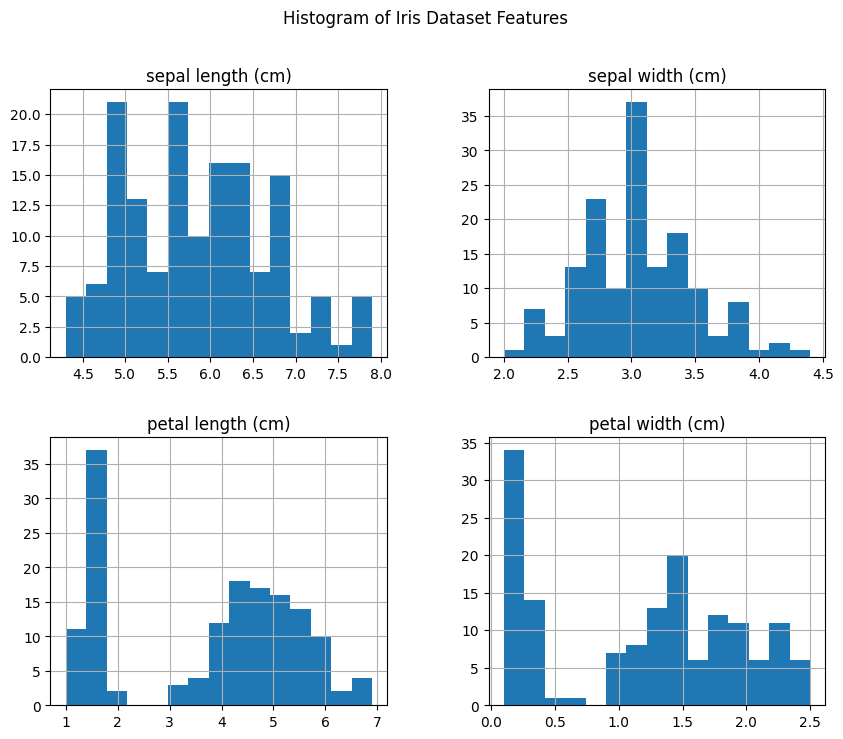

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

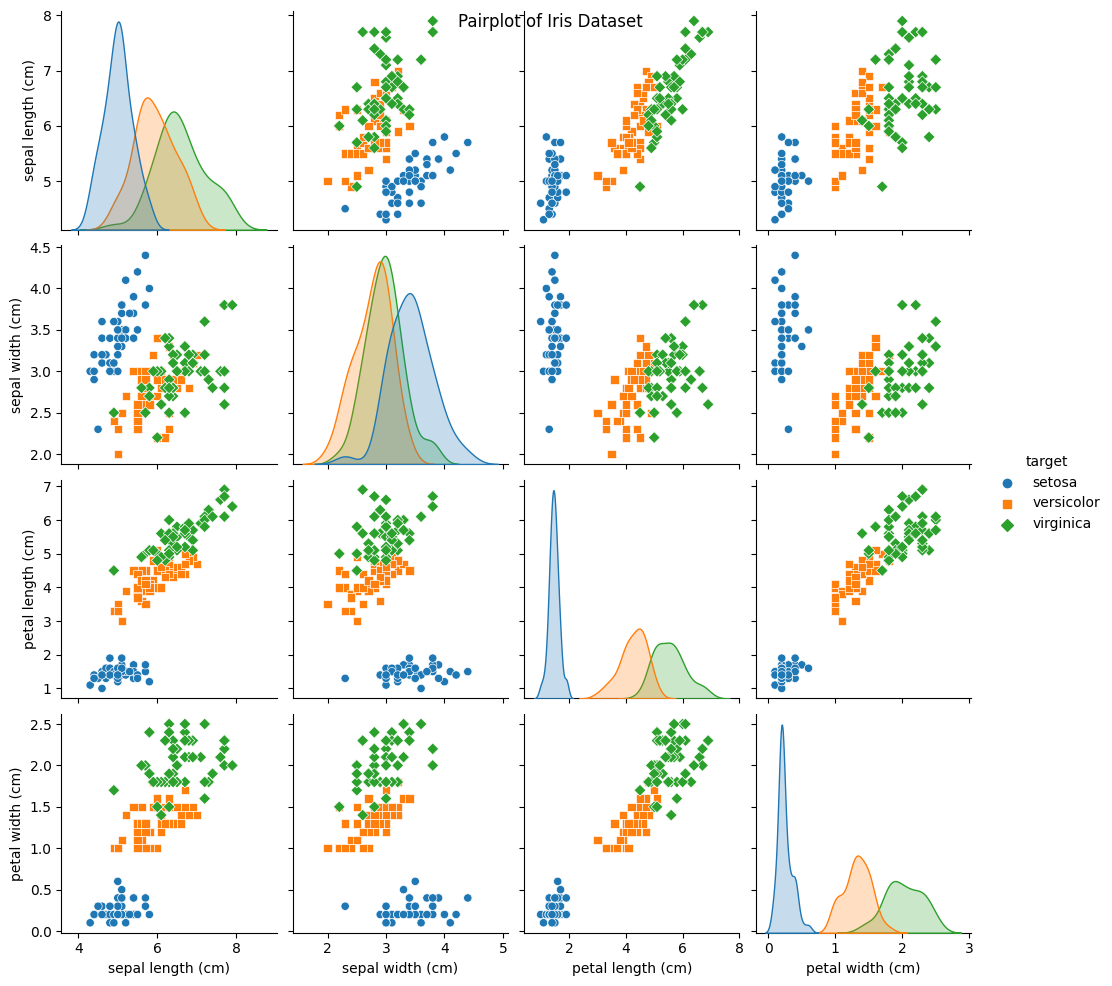

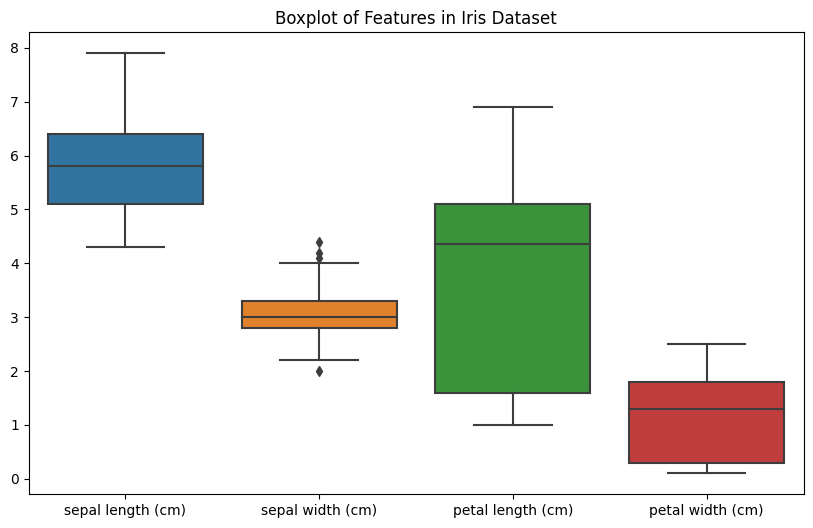

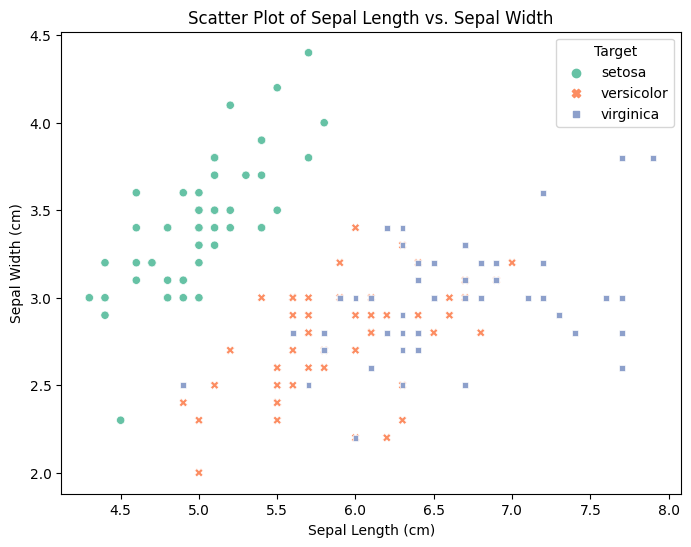

In [13]:
# Creating Histogram for each feature
data.hist(figsize=(10, 8), bins=15)
plt.suptitle("Histogram of Iris Dataset Features")
plt.show()

# Next, Pairploting to visualize relationships between features
sns.pairplot(data, hue='target', diag_kind='kde', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset")
plt.show()

# In this step, Boxploting for feature comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns='target'))
plt.title("Boxplot of Features in Iris Dataset")
plt.show()

# Scatter plotting with hue based on target
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['sepal length (cm)'], 
    y=data['sepal width (cm)'], 
    hue=data['target'], 
    style=data['target'], 
    palette='Set2'
)
plt.title("Scatter Plot of Sepal Length vs. Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Target")
plt.show()


# 3. Data Analysis


Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


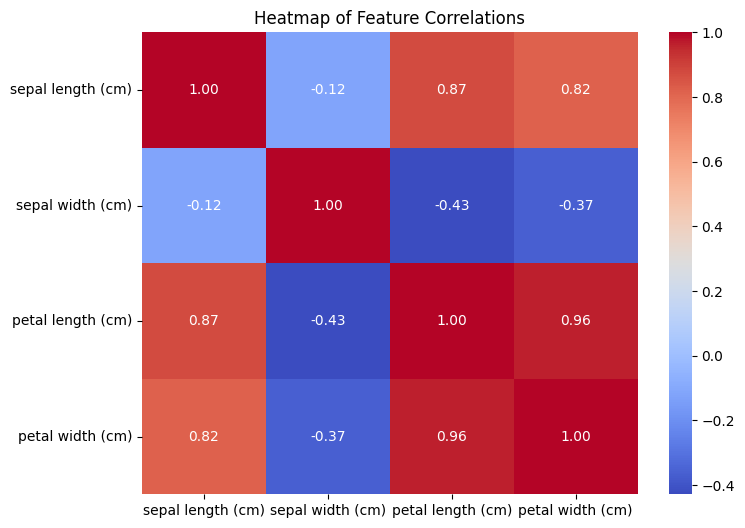


Number of Outliers per Feature:
sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [15]:
# Creating Correlation matrix
correlation_matrix = data.drop(columns='target').corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Showing Heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

# Identifying outliers using the interquartile range (IQR)
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound))

# Detecting outliers for each feature
outlier_data = data.drop(columns='target').apply(identify_outliers)
print("\nNumber of Outliers per Feature:")
print(outlier_data.sum())
